In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv


In [2]:
daily_df = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv')
submission_df = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv')

data = daily_df.copy()
submission = submission_df.copy()

print("Daily data:", data.shape)
print("Submission:", submission.shape)

Daily data: (2893, 17)
Submission: (2893, 2)


In [3]:
data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [4]:
submission.head()

,day_id,condition_text
0,D0001,NaN
1,D0002,NaN
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,NaN


In [5]:
data.columns

Index(['day_id', 'city_id', 'temperature_celsius', 'condition_text',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_us-epa-index', 'sunrise', 'sunset'],
      dtype='object')

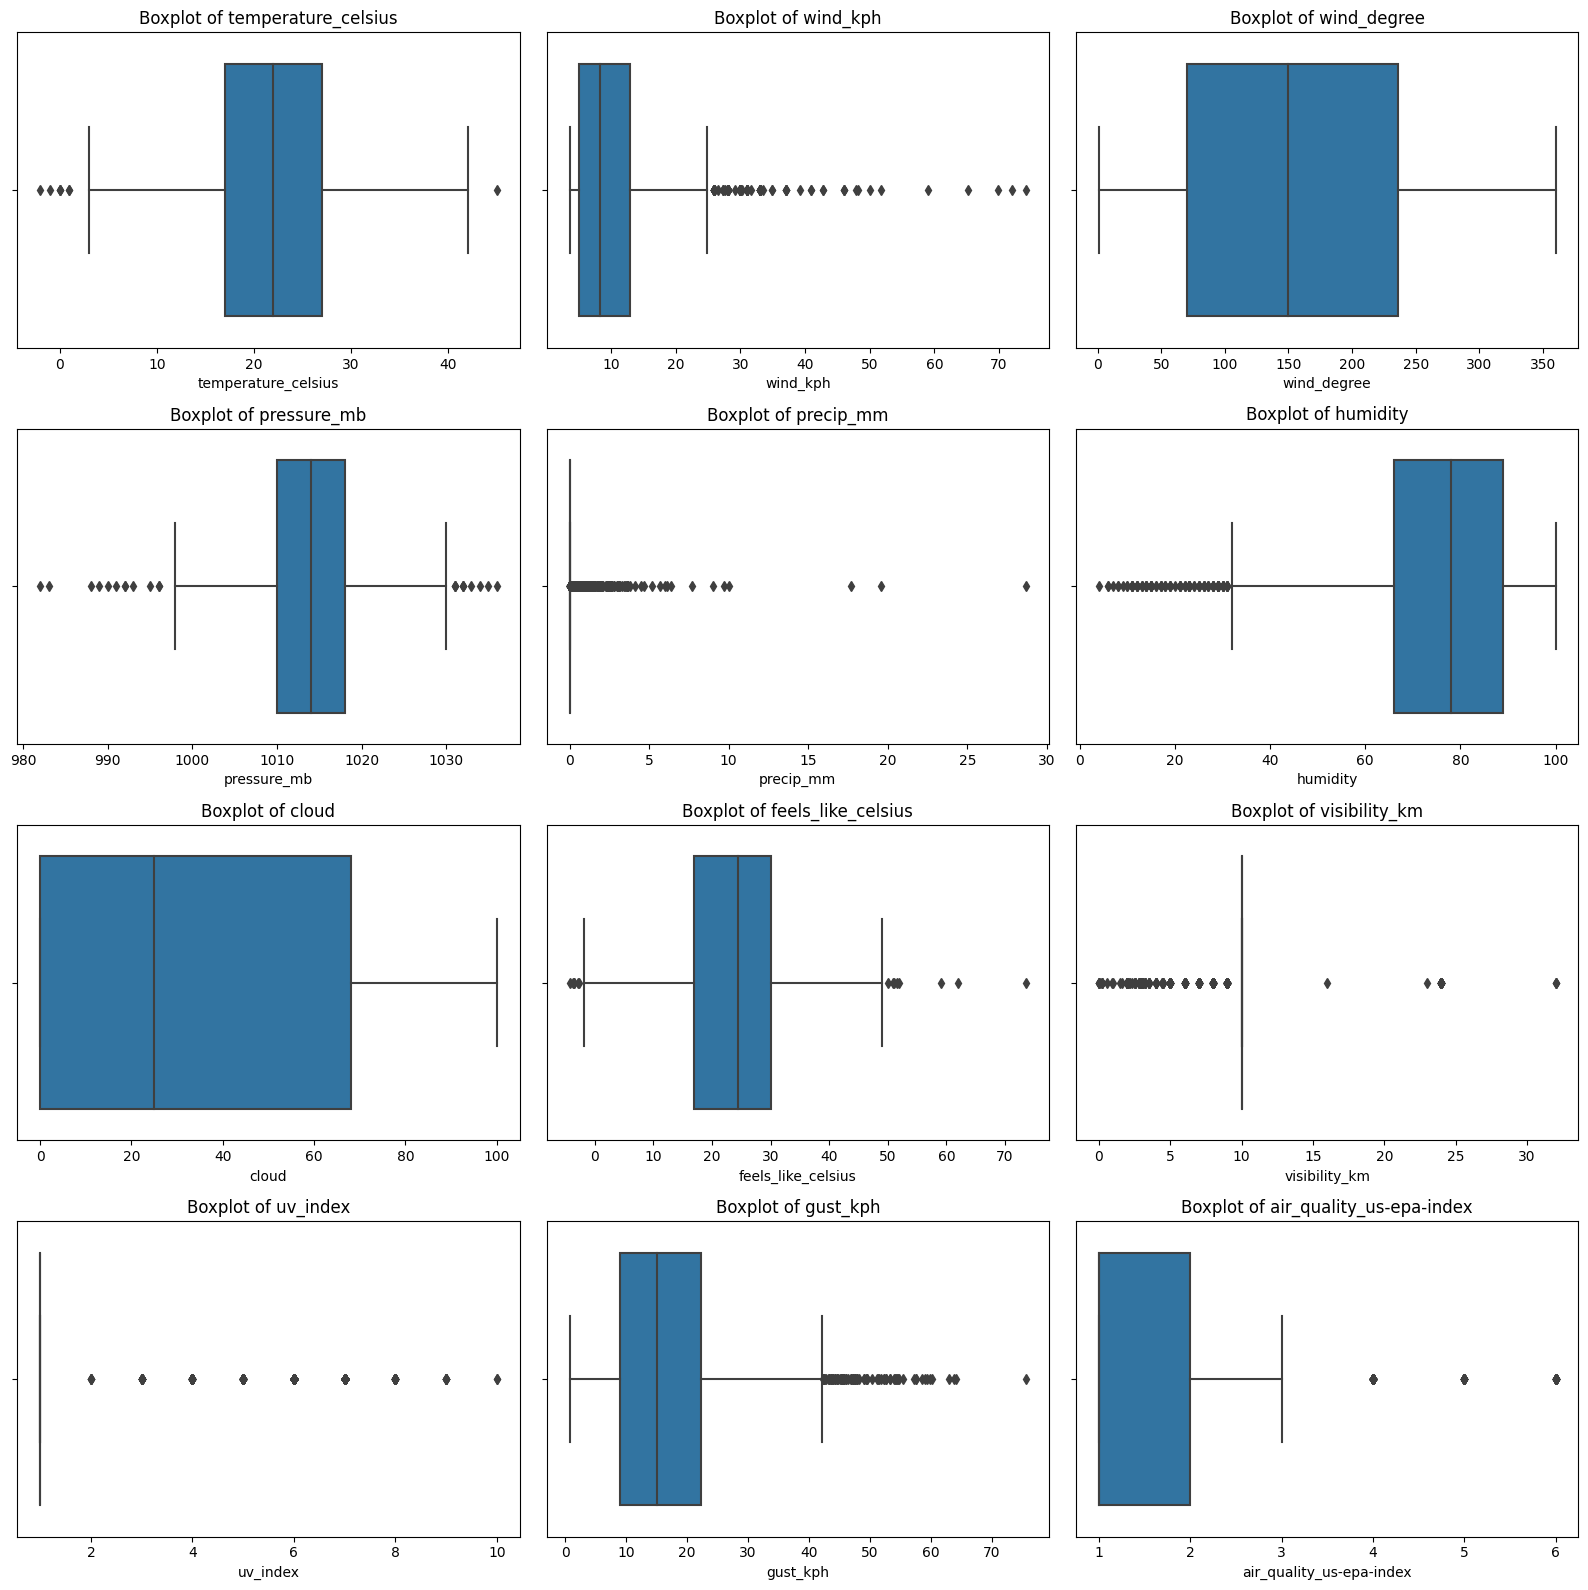

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the DataFrame
numeric_columns = ['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 
                   'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 
                   'visibility_km', 'uv_index', 'gust_kph', 'air_quality_us-epa-index']

# Set up the plot grid
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))  # Adjust the figsize as needed

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import numpy as np

# Select numeric columns from the DataFrame
columns_to_impute = ['temperature_celsius', 'pressure_mb']

# Replace outliers with median for each column
for column in columns_to_impute:
    # Calculate median excluding outliers (e.g., values beyond certain quantiles)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median = data[column].median()
    
    # Replace outliers with median
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])

# Display the modified DataFrame
data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


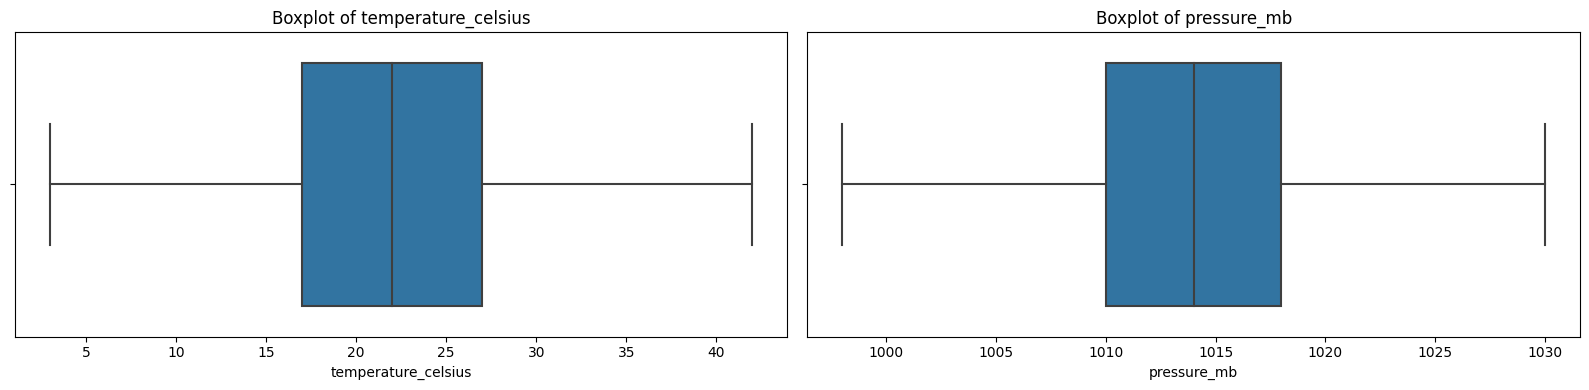

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns from the DataFrame
numeric_columns = ['temperature_celsius', 'pressure_mb']

# Set up the plot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  # Adjust the figsize as needed

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
# Drop day_id
data = data.drop(columns=['day_id'])

In [10]:
# Function to convert time to minutes since midnight
def time_to_minutes(time_str):
    time = pd.to_datetime(time_str, format='%I:%M %p')
    minutes_since_midnight = time.hour * 60 + time.minute
    return minutes_since_midnight

# Data cleaning and preprosessing for sunrise & sunset
data['sunrise_minutes'] = data['sunrise'].apply(time_to_minutes)
data['sunset_minutes'] = data['sunset'].apply(time_to_minutes)

data = data.drop(columns=['sunrise', 'sunset'])
data.head()

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise_minutes,sunset_minutes
0,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,364,1159
1,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,365,1158
2,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,365,1158
3,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,366,1156
4,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,367,1155


In [11]:
# Define the mapping dictionary
condition_mapping = {
    'Clear and Sunny': 0,
    'Partly Cloudy': 1,
    'Light Precipitation': 2,
    'Cloudy and Overcast': 3,
    'Mist or Fog': 4,
    'Rain Showers': 5,
    'Light Rain with Thunder': 6,
    'Thunderstorms': 7,
    'Moderate to Heavy Rain': 8
}

# Apply the mapping to create a new 'condition_label' column
data['condition_text'] = data['condition_text'].map(condition_mapping)

data.head()

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise_minutes,sunset_minutes
0,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,364,1159
1,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,365,1158
2,C001,20.0,6.0,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,365,1158
3,C001,17.0,0.0,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,366,1156
4,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,367,1155


In [12]:
# Separate rows with and without null target values
train_data = data[data['condition_text'].notnull()]
test_data = data[data['condition_text'].isnull()]

# Capture original indices
train_indices = train_data.index
test_indices = test_data.index


In [13]:
# Features and target of train
X = train_data.drop(columns=['condition_text'])
y = train_data['condition_text']

# Features of test
X_test = test_data.drop(columns=['condition_text'])

In [14]:
X.head()

,city_id,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise_minutes,sunset_minutes
2,C001,20.0,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,365,1158
3,C001,17.0,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,366,1156
6,C001,21.0,4.0,310,1015.0,0.0,100,50,21.0,10.0,1.0,15.1,2,368,1151
18,C001,19.0,3.6,64,1017.0,0.0,88,0,19.0,10.0,1.0,8.3,3,380,1131
27,C002,19.0,3.6,83,1010.0,0.0,73,25,19.0,10.0,1.0,8.3,1,377,1160


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce

# Custom transformer for target encoding city_id
class TargetEncoderWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.target_encoder = ce.TargetEncoder(cols=['city_id'])
    
    def fit(self, X, y=None):
        self.target_encoder.fit(X['city_id'], y)
        return self
    
    def transform(self, X):
        X = X.copy()  # To avoid modifying the original dataframe
        X['city_id_encoded'] = self.target_encoder.transform(X['city_id'])
        return X.drop(columns=['city_id'])

numerical_cols = ['temperature_celsius', 'wind_kph', 'wind_degree',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius',
       'visibility_km', 'gust_kph',
       'sunrise_minutes', 'sunset_minutes']

categorical_cols = ['uv_index', 'air_quality_us-epa-index']
    
# Column Transformer
ct = ColumnTransformer([
    ('target_encoder', TargetEncoderWrapper(), ['city_id']),
    ('scaler', RobustScaler(), numerical_cols),
], remainder='passthrough')

# Base model for feature selection
base_model = RandomForestClassifier(n_estimators=100)

# Feature Selection with RFE
rfe = RFE(estimator=base_model, n_features_to_select=10, step=1)

# Pipeline with preprocessing and feature selection
pipeline = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', rfe)
])

preprocessor_feature_names = (
    ['city_id_encoded'] + numerical_cols + categorical_cols
)

# Fit and transform on train data
X_transformed = pipeline.fit_transform(X, y)

selected_feature_indices = rfe.get_support(indices=True)
selected_feature_names = [preprocessor_feature_names[i] for i in selected_feature_indices]

# Get feature names after transformation
X_transformed = pd.DataFrame(X_transformed, columns=selected_feature_names)

# Transform test data
X_test_transformed = pipeline.transform(X_test)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=selected_feature_names)


In [16]:
X_transformed.head()

,city_id_encoded,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,gust_kph,sunrise_minutes,sunset_minutes
0,2.063961,-0.285714,45.0,0.772727,0.333333,-0.365019,0.0,-0.185430,-0.272727,0.483221
1,2.063961,0.714286,0.0,0.227273,-0.666667,-0.593156,0.0,-0.278146,-0.250000,0.456376
2,2.063961,0.285714,0.0,0.772727,0.000000,-0.288973,0.0,-0.019868,-0.204545,0.389262
3,2.063961,0.571429,0.0,0.227273,-0.666667,-0.441065,0.0,-0.470199,0.068182,0.120805
4,2.210655,-0.428571,0.0,-0.454545,-0.333333,-0.441065,0.0,-0.470199,0.000000,0.510067


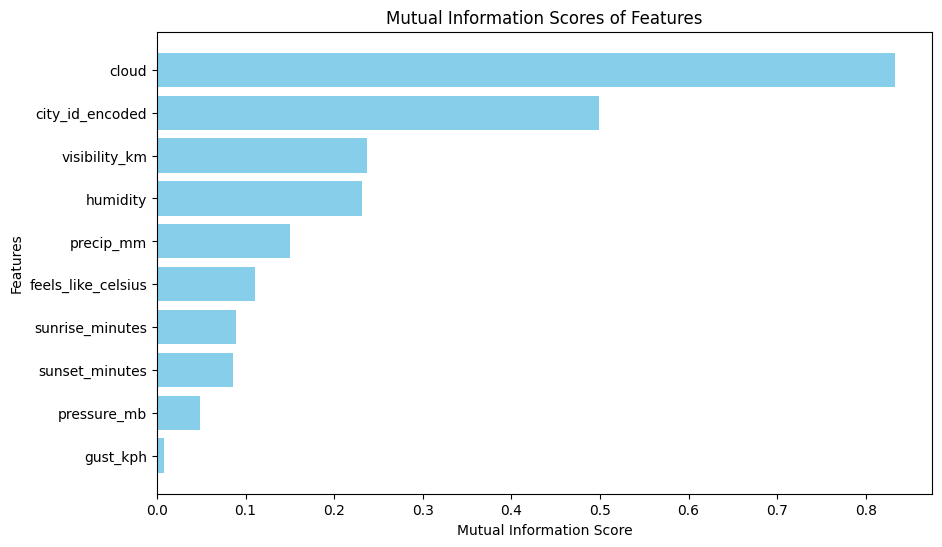

In [17]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Calculate MI values
mi_scores = mutual_info_classif(X_transformed, y)

# Create a DataFrame to store MI scores with feature names
mi_scores_df = pd.DataFrame({'Feature': X_transformed.columns, 'MI Score': mi_scores})

# Sort the DataFrame by MI Score in descending order
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.barh(mi_scores_df['Feature'], mi_scores_df['MI Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores of Features')
plt.gca().invert_yaxis()  # Invert y-axis to have highest MI score on top
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X_transformed, y, test_size=0.1, random_state=48)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Hyperparameter tuning
param_grid = {
    'n_estimators': [200],  # [100, 200, 300]
    'learning_rate': [0.01],  # [0.001, 0.01, 0.1]
    'max_depth': [3],  # [3, 5, 7]
    'colsample_bytree': [0.7],  # [0.3, 0.7]
}

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_xgb.predict(X_valid)

# Evaluate performance
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy}')

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Validation Accuracy: 0.7291666666666666
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [300],  # [100, 200, 300]
    'max_depth': [7],  # [3, 5, 7]
    'max_features': ['log2'],  # ['sqrt', 'log2']
    'min_samples_split': [5],  # [2, 5, 10]
    'min_samples_leaf': [2],  # [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_rf.predict(X_valid)

# Evaluate performance
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy}')

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Validation Accuracy: 0.7291666666666666
Best parameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [21]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Updated hyperparameter tuning grid for LightGBM
param_grid = {
    'n_estimators': [200],  # [100, 200, 300]
    'learning_rate': [0.01],  # [0.01, 0.05, 0.1]
    'max_depth': [3],  # [3, 5, 7]
    'num_leaves': [20],  # [20, 30, 40]
    'min_child_samples': [10],  # [10, 20, 30]
    'colsample_bytree': [1.0]  # [0.7, 0.8, 1.0]
}

lgbm = LGBMClassifier()

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_lgbm = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_lgbm.predict(X_valid)

# Evaluate performance
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy}')

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 10
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.363305
[LightGBM] [Info] Start training from score -1.928619
[LightGBM] [Info] Start training from score -2.203055
[LightGBM] [Info] Start training from score -2.229724
[LightGBM] [Info] Start training from score -3.068053
[LightGBM] [Info] Start training from score -3.355735
[LightGBM] [Info] Start training from score -3.643417
[LightGBM] [Info] Start training from score -3.761200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create a VotingClassifier with both XGB and RF
voting_clf = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', best_rf),
    ('lgbm', best_lgbm),
], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict on the validation set
y_pred = voting_clf.predict(X_valid)

# Evaluate performance
accuracy = accuracy_score(y_valid, y_pred)
print(f'Validation Accuracy: {accuracy}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 431, number of used features: 10
[LightGBM] [Info] Start training from score -1.383977
[LightGBM] [Info] Start training from score -1.365628
[LightGBM] [Info] Start training from score -1.938974
[LightGBM] [Info] Start training from score -2.215960
[LightGBM] [Info] Start training from score -2.215960
[LightGBM] [Info] Start training from score -3.070376
[LightGBM] [Info] Start training from score -3.293519
[LightGBM] [Info] Start training from score -3.668213
[LightGBM] [Info] Start training from score -3.763523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [23]:
# Retrain each model on the whole dataset
best_xgb.fit(X_transformed, y)
best_rf.fit(X_transformed, y)
best_lgbm.fit(X_transformed, y)

# Train the voting classifier with entire data
voting_clf.fit(X_transformed, y)

# Predict on the test set (data with null condition_text)
test_data.loc[:, 'condition_text'] = voting_clf.predict(X_test_transformed)

# Combine train_data and test_data
combined_data = pd.concat([train_data, test_data], axis=0)
combined_data.sort_index(inplace=True)

print("Combined data shape:", combined_data.shape)
combined_data.head()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 479, number of used features: 10
[LightGBM] [Info] Start training from score -1.367680
[LightGBM] [Info] Start training from score -1.367680
[LightGBM] [Info] Start training from score -1.952193
[LightGBM] [Info] Start training from score -2.201409
[LightGBM] [Info] Start training from score -2.259678
[LightGBM] [Info] Start training from score -3.127178
[LightGBM] [Info] Start training from score -3.399112
[LightGBM] [Info] Start training from score -3.463650
[LightGBM] [Info] Start training from score -3.686794
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise_minutes,sunset_minutes
0,C001,27.0,1.0,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,364,1159
1,C001,22.0,1.0,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,365,1158
2,C001,20.0,6.0,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,365,1158
3,C001,17.0,0.0,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,366,1156
4,C001,18.0,0.0,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,367,1155


In [24]:
submission['condition_text'] = combined_data['condition_text']

# Reverse mapping dictionary
reverse_condition_mapping = {v: k for k, v in condition_mapping.items()}

submission['condition_text'] = submission['condition_text'].map(reverse_condition_mapping)

submission.head()

,day_id,condition_text
0,D0001,Partly Cloudy
1,D0002,Partly Cloudy
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny


In [25]:
# Output csv file
submission.to_csv('submission.csv', index=False)